In [170]:
import string

import mglearn
import pandas as pd
import wikipedia

articles = ['Computer security',
            'Automotive security',
            'Cybercrime', 
            'Cybersex trafficking',
            'Computer fraud',
            'Cybergeddon', 
            'Cyberterrorism',
            'Cyberwarfare',
            'Electromagnetic warfare',
            'Information warfare',
            'Internet security ', 
            'Mobile security', 
            'Network security', 
            'Copy protection',
            'Advanced persistent threat',
            
            
        'Standard Model','Quantum field theory','Quantum electrodynamics','Quantum chromodynamics','Electroweak theory','Effective field theory','Lattice field theory','Gauge theory','Supersymmetry',
          'Grand Unified Theory','Superstring theory','M-theory','AdS/CFT correspondence','Quantum optics','Quantum chemistry', 
            
            
            'Caucasus',
            'Dagestan',
            'Chechnya',
            'Ingushetia',
            'Kabardino-Balkaria',
            'Adygea',
            'Lezgins',
            'Lezgistan',
            'Caucasian Albania',
            'Makhachkala',
            'Derbent',
            'Kizlyar',
            
            
            
            
            ]


In [171]:

print(f"Amount of articles : {len(articles)}")
count = 1
wiki_lst = []
for articl in articles:
    wiki_lst.append(wikipedia.page(articl).content)
    print(f"{count}. appended : {articl}")
    count += 1


Amount of articles : 42
1. appended : Computer security
2. appended : Automotive security
3. appended : Cybercrime
4. appended : Cybersex trafficking
5. appended : Computer fraud
6. appended : Cybergeddon
7. appended : Cyberterrorism
8. appended : Cyberwarfare
9. appended : Electromagnetic warfare
10. appended : Information warfare
11. appended : Internet security 
12. appended : Mobile security
13. appended : Network security
14. appended : Copy protection
15. appended : Advanced persistent threat
16. appended : Standard Model
17. appended : Quantum field theory
18. appended : Quantum electrodynamics
19. appended : Quantum chromodynamics
20. appended : Electroweak theory
21. appended : Effective field theory
22. appended : Lattice field theory
23. appended : Gauge theory
24. appended : Supersymmetry
25. appended : Grand Unified Theory
26. appended : Superstring theory
27. appended : M-theory
28. appended : AdS/CFT correspondence
29. appended : Quantum optics
30. appended : Quantum che

In [123]:
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string


In [124]:
print(len(wiki_lst))

41


In [172]:
# Прерпоцессинг текста, приведение к ловеркейсу, стемминг
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /home/cere/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/cere/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [173]:
stop_words = set(stopwords.words('english'))
punct = set(string.punctuation)
# - ты садист?
# - я дивергент
print(stop_words)
print(punct)

{'i', 'o', 'won', 'itself', 'doing', 'into', 'don', 'nor', 'me', 'our', 'should', 'no', 'until', 'it', 'because', 'myself', 'in', 'hers', 'aren', 'as', "you're", 'him', 'by', 'or', "hasn't", 'any', 'himself', 'their', 'before', 'then', "shan't", "mightn't", "hadn't", 'wouldn', 'hasn', 'most', 'both', 'than', 'theirs', 'just', 'couldn', 't', 'can', 'didn', 'the', 'further', 'that', "she's", 'down', 'why', 'they', "it's", 'mustn', 'were', 'a', "isn't", "wasn't", "you'd", 'she', 'weren', 'how', "you'll", 'who', 'some', "doesn't", 'too', 'ours', 'an', 'there', 'once', 'your', 'when', 'below', 'over', 'shan', 'under', 'same', "should've", 'yourself', 'his', 'again', 'which', 'not', 'very', 'above', "didn't", 'all', 'haven', 'ourselves', 'themselves', 'its', 'other', 'have', 'with', 'to', 'and', 'ma', 'does', 'had', 'are', 'needn', 'out', 'off', 'isn', 'between', 'herself', 'be', 'for', 'hadn', 'here', 'those', 'my', 'such', 'did', 'll', "shouldn't", 'do', 'wasn', "don't", 'y', 'of', 'ain', 

In [174]:

def text_preprocessing(text: string):
    words = word_tokenize(text.lower())
    filtered_words = [word for word in words if word not in stop_words and word not in punct]
    return " ".join(filtered_words)


text = "Reverse engineering is cool, isn't it?"
print(text_preprocessing(text))

reverse engineering cool n't


In [175]:
nlp = spacy.load('en_core_web_sm')

In [176]:
def preprocess(text: string):
    text = nlp(text.lower())
    processed_text = []
    for token in text:
        if (token.text not in punct) and (token.text not in stop_words):
            processed_text.append(token.lemma_)

    return " ".join(processed_text)


In [177]:

processed_text = []
for article in wiki_lst:
    processed_text.append(preprocess(article))

In [178]:


# idk what is it some shaitan shit below
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(preprocessor=preprocess)
X = vectorizer.fit_transform(wiki_lst)

In [179]:
print(X)

  (0, 10001)	0.004602472197591245
  (0, 639)	0.004602472197591245
  (0, 588)	0.004602472197591245
  (0, 189)	0.00920494439518249
  (0, 6440)	0.003565808544092642
  (0, 5529)	0.004602472197591245
  (0, 6879)	0.004602472197591245
  (0, 11078)	0.004602472197591245
  (0, 2218)	0.004602472197591245
  (0, 11114)	0.004602472197591245
  (0, 9051)	0.004602472197591245
  (0, 2213)	0.004602472197591245
  (0, 11440)	0.004602472197591245
  (0, 5409)	0.003565808544092642
  (0, 12362)	0.0033595354425509667
  (0, 511)	0.002781602763530172
  (0, 2873)	0.00920494439518249
  (0, 195)	0.004602472197591245
  (0, 3426)	0.003565808544092642
  (0, 9486)	0.004143741223113437
  (0, 2311)	0.004143741223113437
  (0, 3656)	0.0023228717890523627
  (0, 6419)	0.004602472197591245
  (0, 6560)	0.0020554286667008948
  (0, 5880)	0.004602472197591245
  :	:
  (41, 4757)	0.01114762127577658
  (41, 8402)	0.018534988540728447
  (41, 1597)	0.012583591572559576
  (41, 3038)	0.01322869355421638
  (41, 10613)	0.012900381499081032

In [180]:
print(vectorizer.get_feature_names_out())

['000' '00005' '0001283' ... 'ḥamīd' 'ḳavḳasosi' 'ἀλβανία']


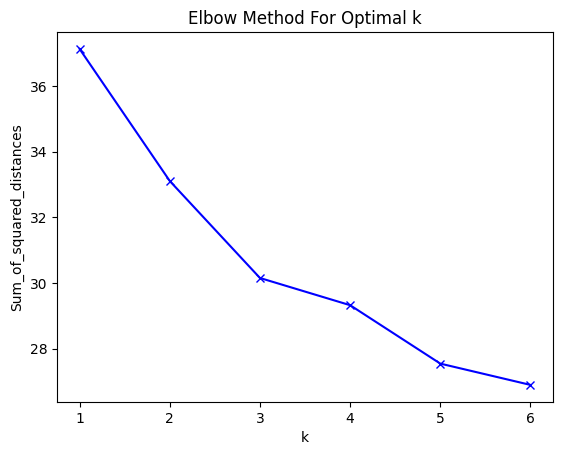

In [182]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1, 7)
for k in K:
    km = KMeans(n_clusters=k, max_iter=600)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [185]:
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=600)
model.fit(X)
labels = model.labels_
wiki_cl = pd.DataFrame(list(zip(articles, labels)), columns=['title', 'cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                         title  cluster
41                     Kizlyar        0
31                    Dagestan        0
32                    Chechnya        0
33                  Ingushetia        0
34          Kabardino-Balkaria        0
30                    Caucasus        0
36                     Lezgins        0
37                   Lezgistan        0
38           Caucasian Albania        0
39                 Makhachkala        0
35                      Adygea        0
40                     Derbent        0
21        Lattice field theory        1
29           Quantum chemistry        1
28              Quantum optics        1
27      AdS/CFT correspondence        1
26                    M-theory        1
25          Superstring theory        1
24        Grand Unified Theory        1
23               Supersymmetry        1
22                Gauge theory        1
20      Effective field theory        1
18      Quantum chromodynamics        1
17     Quantum electrodynamics        1


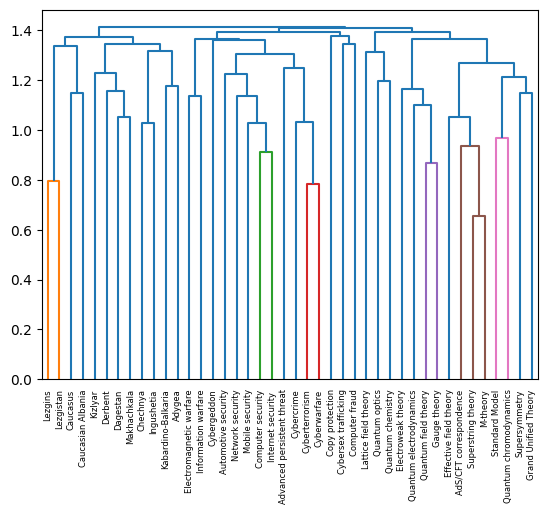

In [186]:
from scipy.cluster.hierarchy import linkage, dendrogram


mergings = linkage(X.toarray(), method='complete')
dendrogram(mergings,
           labels=articles,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.show()

In [231]:
from sklearn.preprocessing import StandardScaler
# масштабируем данные так, чтобы получить нулевое среднее и единичную дисперсию
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# выводим принадлежность к кластерам

ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.